**<center><font size = "6">Logistic Regression<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span></li><li><span><a href="#Visualización-de-resultados" data-toc-modified-id="Visualización-de-resultados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualización de resultados</a></span></li><li><span><a href="#Demo" data-toc-modified-id="Demo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demo</a></span></li></ul></div>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle
X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))
data_text = pickle.load(open("saved_feats/data_text", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Entrenamiento del modelo

Para ver el estudio realizado de la elección de mejores hierparametros, consulta el siguiente notebook: [Parameters_LogisticRegression](./Parameters_LogisticRegression.ipynb)

In [2]:
clf_logit = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5,'Positive': 0.93},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit.fit(X_train_smt, y_train_smt)
pred_logit = clf_logit.predict(X_test)
pred_prob_logit = clf_logit.predict_proba(X_test)

## Visualización de resultados

In [3]:
print('Predicted classes:', clf_logit.classes_)
print('Average accuracy :', np.mean(
    pred_logit == y_test)*100)
print('Train accuracy :', (clf_logit.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.13411721477127
Train accuracy : 91.0950128129312
Test accuracy : 90.13411721477127

 CONFUSION MATRIX
[[  50   30   39]
 [  31  102  117]
 [  40  280 4754]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.41      0.42      0.42       119
     Neutral       0.25      0.41      0.31       250
    Positive       0.97      0.94      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.59      0.56      5443
weighted avg       0.92      0.90      0.91      5443



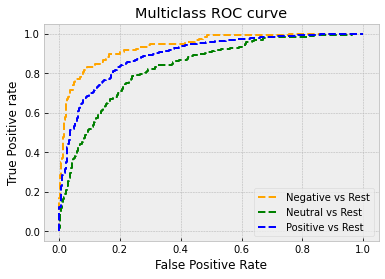

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

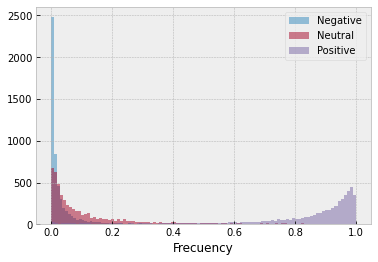

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(pred_prob_logit[:, 0], 100, alpha=0.5, label="Negative")
ax.hist(pred_prob_logit[:, 1], 100, alpha=0.5, label="Neutral")
ax.hist(pred_prob_logit[:, 2], 100, alpha=0.5, label="Positive")
ax.set_xlabel('Probability')
ax.set_xlabel('Frecuency')
ax.legend(prop={'size': 10})

/tmp/ipykernel_62313/1937338866.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


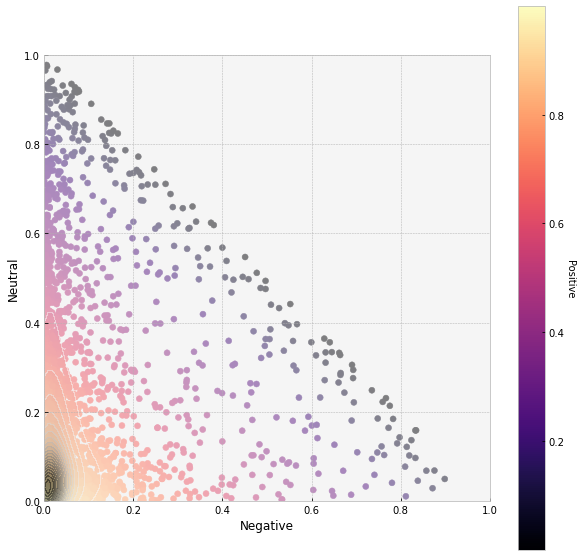

In [6]:
x = pred_prob_logit[:, 0]
y = pred_prob_logit[:, 1]
z = pred_prob_logit[:, 2]
cmap = plt.get_cmap('magma')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
plt.scatter(x, y, c=z, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Positive', rotation=270, fontsize=10, labelpad=10.0)
ax.set_aspect('equal', adjustable='box')
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

xx, yy = np.mgrid[0:1:100j, 0:1:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

plt.contourf(xx, yy, f, levels=20, cmap=plt.get_cmap('Greys'), alpha=0.5)
plt.show()

## Demo

In [7]:
# CountVectorizer followed by TfidfTransformer
tfidf = TfidfVectorizer(use_idf=True, norm='l2',
                        smooth_idf=True, sublinear_tf=False, max_features=5000)
tfidf.fit_transform(data_text)

# Input sentence
text = input("Enter sentence: ")
arr_text = np.array([text])
tfidf_arr_text = tfidf.transform(arr_text)

# Output
print(clf_logit.predict(tfidf_arr_text))

Enter sentence: this tablet was not worth it at all
['Negative']
